## Procesamiento y extracción de características de una señal EEG 

#### Importación de librerías

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import neurokit2 as nk
import biosignalsnotebooks as bsnb


from math import log10

#### Importación de la señal

In [14]:
SenalEEG = np.genfromtxt("Signal/EEG_Toma2_ejercicios.txt", delimiter ="\t", skip_header=3)
Fs = 100
EEG = SenalEEG[:,5]
t = (np.arange(0,len(EEG)) / Fs)

#Función de transferencia 
Gemg = 41782
Vcc = 3.3
n = 10

EEG = (((EEG/2**n)-(1/2))*Vcc)/Gemg
EEG = EEG * (1*10**6)

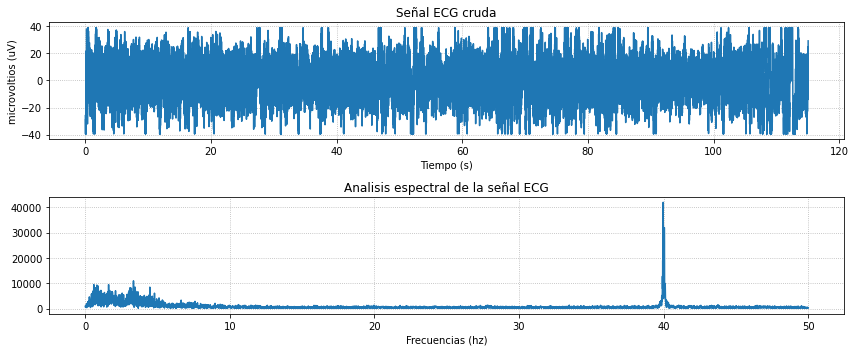

In [15]:
#Transformada de Fourier
freq_axis_1, power_spect_1 = bsnb.plotfft(EEG, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(t,EEG)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("microvoltios (uV)")
plt.title("Señal EEG cruda")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EEG - cruda")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_1, power_spect_1)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('ECGyFFT_crudo.png', transparent=False, )
plt.show()

#### Filtrado

In [16]:
from scipy.signal import iirnotch, lfilter


eegfilter_signal = bsnb.bandpass(EEG, f1=0.5,f2=35, order=4, fs=Fs)
# Utilizar filtros Notch para quitar frecuencias que hagan ruido # Frecuencia de muestreo (Hz)
f0 = 40.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
eegfilter_signal = lfilter(b, a, eegfilter_signal)
eegfilter_signal = lfilter(b, a, eegfilter_signal)

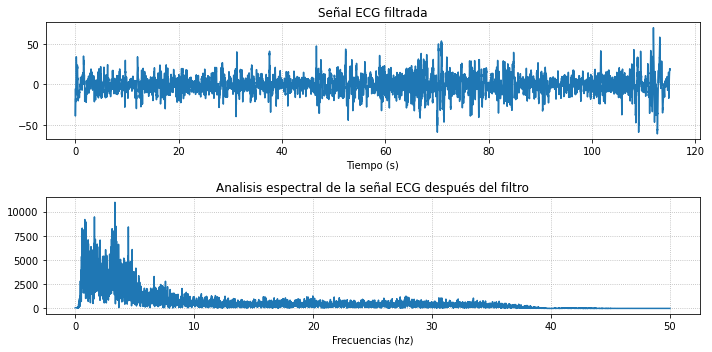

In [17]:
freq_axis_2, power_spect_2 = bsnb.plotfft(eegfilter_signal, Fs)


#Visualización señal filtrada
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(t,eegfilter_signal) # graficamos la señal filtrada
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("microvoltios (uV)")
plt.title("Señal EEG filtrada")

#Visualizacion de la respuesta en frecuencia después del filtro
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EEG después del filtro")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_2, power_spect_2)
#plt.xlim(0,100)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('ECGyFFT_filtrada.png', transparent=False, )